# Spirtes-Glymour-Scheines (SGS)

1. Defition
2. The SGS Original Algorithm Described in the Book
3. SGS Algorithm Complexity Analysis
4. SGS Algorithm Stability Analysis
5. Violations of the Causal Assumptions
6. Implementation Details
7. Execution Example


## 1. Definition

<span style="font-family: Calibri; font-size: 14pt;">
From the book <i>"Causation, Prediction, and Search"</i> by Peter Spirtes, Clark Glymour, and Richard Scheines.</span>

<span style="font-family: Calibri; font-size: 14pt;">
The Spirtes-Glymour-Scheines (SGS) algorithm is a constraint-based algorithm for causal discovery that uses conditional independence tests to determine the presence of causal relationships between variables. It's designed to learn the structure of a Bayesian network from observational data.</span>

<span style="font-family: Calibri; font-size: 14pt;">The algorithm is based on the following assumptions:</span>

`
i. The set of observed variables is causaly sufficient for the set of unobserved variables. This means that the observed variables contain all the information needed to determine the causal structure of the unobserved variables.
`

`
    ii. Every unit in the population has the same causal relations among all variables.
`
`
    iii. The distribution of the observed variables is faithful to an acyclic directed graph of the causal structure (in the discrete case) or linearly faithful to such graphs (in the linear case). The **faithfulness assumption** states that if two variables are conditionally independent given a set of other variables, then there is no edge between them in the causal graph. The faithfulness assumption can be violated if the data is generated by a non-linear model.
`

`
    iv. The statistical decisions required by the algorithms are correct for the population.
`

<span style="font-family: Calibri; font-size: 14pt;">In English:</span>

`1. Causal Markov Condition: Each variable is independent of its non-descendants given its parents.
`

`
2. Faithfulness: If two variables are conditionally independent, it's because there is no direct causal path between them, not because of a cancellation effect.
`

`
3. Causal Sufficiency: There are no hidden confounding variables.
`

`
4. Acyclicity: The true causal structure can be represented as a Directed Acyclic Graph (DAG), meaning it does not contain any cycles or feedback loops.
`


<span style="font-family: Calibri; font-size: 14pt;"> 
This is a strong set of assumptions that is often not met in practice, but it is no stronger than the assumptions that would be required to warrant most of the particular statistical models with a causal interpretation found in the medical, behavioral, and social scientific literature.</span>



## 2. The SGS Original Algorithm Described in the Book

```pseudo
1. Form the complete undirected graph H on the vertex set V.
2. For each pair of vertices A and B, 
    2.1. If there exists a subset S of V\{A,B} such that A and B are d-separated given S, remove the edge between A and B from H

3. Let K be the undirected graph resulting from step 2. For each triple of vertices A, B, and C such that the pair A and B and the pair B and C are each adjacent in K (written as A - B - C) but the pair A and C are not adjacent in K, orient A - B - C as A → B ← C if and only if there is no subset S of {B} ∪ V\{A,C} that d-separates A and C.

4. Repeat until no more edges can be oriented:
    4.1. If A -> B, B and C are adjacent, A and C are not adjacent, and there is no arrowhead at B, then orient B - C as B -> C
    4.2. If there is a directed path from A to B, and an edge between A and B, then orient A - B as A -> B.


<span style="font-family: Calibri; font-size: 14pt;">
<b>In English:</b><br/>
</span>


<span style="font-family: Calibri; font-size: 14pt;">
The algorithm proceeds in three main stages:
</span>

```pseudo
# Skeleton Identification Phase
1. Start with a complete undirected graph on the set of all variables

2. For each pair of variables X and Y in the graph do the following:
    2.1. If X and Y are conditionally independent given some subset of the remaining variables, then remove the edge between X and Y
    
# V-Structure Phase
3. For each pair of non-adjacent variables X and Y, do the following:
    3.1. If there exists a variable Z such the both X -> Z and Y -> Z exist in the graph, add a directed edge X -> Y if there is no subset of remaining variables that X is conditionally independent of Y.

# Orientation Phase
4. While there exists directed edges that can be oriented do the following:
    4.1. For each pair of variables X, Y where X - Y is an edge in the graph and Y - Z is a directed edge for some variable Z, 
        4.1.1. orient X -Y as X -> Y if not orienting it in that way would create a new v-structure that is not justified by the data.
    4.2. For each pair of variables X, Y where X - Y is an edge in the graph and X - Z is a directed edge for some variable Z, 
        4.2.1. orient X - Y as X -> Y if not orienting it in that way would create a cycle.

## 3. SGS Algorithm Complexity Analysis

<span style="font-family: Calibri; font-size: 14pt;">The book states that: </span>

> <span style="font-family: Calibri; font-size: 14pt;">In the worst case, the SGS algorithm requires a number of d-separation tests that increases exponentially with the number of vertices, as must any algorithm based on conditional independence relations or vanishing partial correlations. But the SGS algorithm is very inefficient because for edges in the true graph the worst case is also the expected case</span>

<span style="font-family: Calibri; font-size: 14pt;">
<br/>In English, this means that:<br/>

i. As the number of variables (represented as vertices or nodes in the graph) increases, the number of d-separation (or conditional independence) tests that the algorithm must perform can increase exponentially. This is because for each pair of nodes, the algorithm needs to check conditional independence given every possible subset of the remaining nodes. The number of these subsets increases exponentially with the total number of nodes.

ii. For edges that exist in the true underlying causal graph, the expected number of tests that the algorithm must perform is the same as the worst-case number. This suggests that <b><u>the algorithm doesn't take advantage of any potential efficiencies that might exist for edges in the true graph and performs a large number of tests even in average or expected situations</u></b>.
 </span>

<span style="font-family: Calibri; font-size: 14pt;">
 SGS requires a lot of conditional independence tests, especially when there are many variables. However, if we want to be sure that we are correctly finding the relationships between variables, we need to do all of this work. This exponential complexity is unavoidable if we want to ensure reliability. The reason for this is a fundamental property of conditional independence: two variables can be dependent given one set of variables, but independent given a different set (whether it's a subset or a superset). This means that to reliably determine whether two variables are conditionally independent, we need to check all possible subsets of the other variables. Any method that tries to take a shortcut will sometimes get the wrong answer.
 </span>

 ### Complexity

 <span style="font-family: Calibri; font-size: 14pt;">Due to the above explanations, I would say that the complexity of the SGS algorithm is:</span>

$$O(2^n) $$

<span style="font-family: Calibri; font-size: 14pt;">where <i>n</i> is the number of variables in the graph. However, in practice, the time complexity can often be less than this worst-case scenario. The actual time complexity depends on factors such as the sparsity of the graph (i.e., how many edges it has relative to the number of nodes) and the specifics of the conditional independence test being used.</span>

## SGS Algorithm Stability Analysis

 <span style="font-family: Calibri; font-size: 14pt;">The authors define the notion of stability as:</span> 

>  <span style="font-family: Calibri; font-size: 14pt;">If intuitively small errors of input produce intuitively large errors of output, the algorithm is not stable.
</span>

<br/>
<span style="font-family: Calibri; font-size: 14pt;">
For the SGS algorithm, a "small" input error might be a few incorrectly determined d-separation relations. A "small" error in the output of the Skeleton Identification Phase (Step 2) would be a few incorrect edges in the graph, and a "small" error in the output of Step 4 (Edge Orientation) would be a few edges with the wrong orientation.
</span> 

<span style="font-family: Calibri; font-size: 14pt;">
Step 2 of the SGS algorithm is <b><u>considered stable</u></b>. If one correct d-separation relation is left out, the algorithm will still usually produce the correct graph, unless the missed relation is the only evidence that two nodes are not connected. Even in that case, the only error will be that those two nodes are mistakenly connected.</span>

<span style="font-family: Calibri; font-size: 14pt;">
Step 3 of the SGS algorithm is <b><u>less stable</u></b>. <b><u>Small errors in the input, either in the graph or in the list of d-separation relations, can lead to many edges being oriented incorrectly</u></b>. This is because the edges involved in "collisions" (V-structures) play a key role in determining the orientations of other edges in the graph. So, if an error leads the algorithm to incorrectly include or exclude a collision, it may affect many other edge orientations. For example, if an edge is mistakenly left out of the input to Step 3, and that edge is involved in a collision in the true graph, the algorithm might incorrectly require a collision elsewhere, leading to errors in the orientations of many other edges. Similarly, if the true graph contains a collision, but one of the edges involved in the collision is left out of the input to Step 3, the algorithm won't be able to correctly orient the remaining edge, and this uncertainty may affect the orientations of other edges.
</span>

<span style="font-family: Calibri; font-size: 14pt;">
Errors in the list of d-separation relations can also cause instability in Step 3. If a necessary d-separation relation is missing from the input, it might not cause an error unless it's the only evidence that there's no collision at a certain node. But if an unnecessary d-separation relation is included in the input, the algorithm might incorrectly conclude that there's no collision where there actually is one, leading to many other edges being oriented incorrectly.
</span>

## 4. Violations of the Causal Assumptions

<span style="font-family: Calibri; font-size: 14pt;">
In the context of the SGS algorithm, there are four key assumptions:
</span>

```pseudo
1. Causal Markov Condition: Each variable is independent of its non-descendants given its parents.
2. Faithfulness: If two variables are conditionally independent, it's because there is no direct causal path between them, not because of a cancellation effect.
3. Causal Sufficiency: There are no hidden confounding variables.
4. Acyclicity: The true causal structure can be represented as a Directed Acyclic Graph (DAG), meaning it does not contain any cycles or feedback loops.
```

<span style="font-family: Calibri; font-size: 14pt;">
If any of these assumptions are violated, the output of the SGS algorithm may not be a DAG. This could be due to errors in the data or the presence of hidden confounding variables.</span>

<span style="font-family: Calibri; font-size: 14pt;">
A double-headed edge in a graph indicates a bi-directional relationship, which is not allowed in a DAG. The presence of such an edge could imply an error in the input data or a violation of the causal sufficiency assumption.
</span>




<span style="font-family: Calibri; font-size: 14pt;">
Specifically, a double-headed edge might suggest the existence of an unmeasured common cause, also known as a confounder or a hidden variable. This is a variable that influences both variables connected by the double-headed edge but is not included in the dataset. This is an important issue in causal inference because the presence of such hidden variables can lead to spurious associations and biased estimates of causal effects.
</span>

## 5. Implementation

### 5.1. Skeleton Phase


```python

def skeleton_phase(self, data : pd.DataFrame, verbose=False ):
    
    #For each pair of variables X and Y in the graph
    for node1 in graph.nodes:
        for node2 in graph.nodes:
            
            if node1 == node2:
                continue
                    
            # Check conditional independence
            # If X and Y are conditionally independent given some subset of the remaining variables, 
            # then remove the edge between X and Y 
            subsets = generate_subsets( remove_vars_from_list(list(graph.nodes()), [node1, node2]) )
            for node3 in subsets:
                
                independent = test_conditional_independence(data, node1, node2, list(node3), verbose=verbose)
                [print(f"\tPr({node1} || {node2}) | {list(node3)}: {independent}") if independent and verbose else None]
                [print(f"----------------------------------------") if independent and verbose else None]
                
                if independent:
                    if graph.has_edge(node1, node2):
                        graph.remove_edge(node1, node2)

    return graph

### 5.2. V-Structure Phase

```Python
def v_structure_phase( graph : nx.classes.graph.Graph, data : pd.DataFrame, verbose=False ):
    
    [print("Entered v-structure phase") if verbose else None]
    
    dag = nx.DiGraph()
    [dag.add_node(node) for node in  graph.nodes()]

    # Identify all triples (X, Y, Z) that form a V-structure X -> Y <- Z
    for X in graph.nodes():
        for Y in graph.nodes():
            for Z in graph.nodes():
                
                if X == Y or X == Z or Y == Z:
                    continue
                
                if graph.has_edge(X, Z) or test_conditional_independence(data, X, Z, [Y], verbose=verbose):
                    continue
                
                if not graph.has_edge(X, Y):
                    graph.add_edge(X, Y, arrowhead='v-struct')
                
                if not dag.has_edge(X, Y):
                    dag.add_edge(X, Y)
                
                if not graph.has_edge(Z, Y):
                    graph.add_edge(Z, Y, arrowhead='v-struct')
                
                if not dag.has_edge(Z, Y):
                    dag.add_edge( Z, Y)

    return graph, dag


### 5.3. Orientation Phase

```Python
def orientation_phase(graph : nx.classes.graph.Graph, dag : nx.DiGraph, verbose=False ):
    
    while True:
        
        change = False
        for edge in list(graph.edges):
            
            node1, node2 = edge
            
            # if this edge is already oriented, skip it
            if 'arrowhead' in graph[node1][node2]:
                continue
            
            # for all nodes connected to node1 that are not node2
            for node3 in graph.neighbors(node1):
                if node3 == node2 or not graph.has_edge(node1, node3):
                    continue
                
                # check if there is a v-structure connecting node1 and node3
                # then add an edge node1 -> node2
                if 'arrowhead' in graph[node1][node3] and graph[node1][node3]['arrowhead'] == 'v-struct':
                    graph.add_edge(node1, node2, arrowhead='v-struct')
                    dag.add_edge(node1, node2)
                    change = True    
                    break
                
            if change:
                continue
            
            # for all nodes connected to node1 that are not node2
            for node3 in graph.neighbors(node2):
                if node3 == node1 or not graph.has_edge(node2, node3):
                    continue
                
                if 'arrowhead' in graph[node2][node3] and graph[node2][node3]['arrowhead'] == 'v-struct':
                    graph.add_edge(node2, node1, arrowhead='v-struct')
                    dag.add_edge(node2, node1)
                    change = True
                    break
                
        # convergence reached
        if not change:
            break
    return graph, dag

## 6. Execution

### 6.1. The Model

<span style="font-family: Calibri; font-size: 14pt;">
Let's suppose that the groundtruth causal graph is the following:
</scan>

In [1]:
import pyAgrum as gum

cbn = gum.fastBN("X1<-X2;X4;X1<-X3")
cbn

(pyAgrum.BayesNet<double>@0x7faa5e8b6400) BN{nodes: 4, arcs: 2, domainSize: 16, dim: 7, mem: 112o}

### 6.2. The Dataset

In [2]:
import pandas as pd

data = pd.read_csv( "data/bn_data.csv" , sep='\t')
data

,X1,X2,X3,X4
0,0.56,0.48,0.60,0.05
1,0.46,0.40,0.45,0.26
2,0.58,0.62,0.69,0.76
3,0.45,0.57,0.52,0.44
4,0.35,0.69,0.46,0.69
...,...,...,...,...
994,0.64,0.22,0.57,0.54
995,0.37,0.62,0.46,0.93
996,0.52,0.46,0.53,0.16
997,0.36,0.57,0.42,0.51


### 6.3. Structure Learning

In [5]:
from src.StructureLearning import StructureLearningAlgorithm
from src.SGS import SGS


SGS = SGS()
SGS.fit(data)

dag = SGS.get_structure()

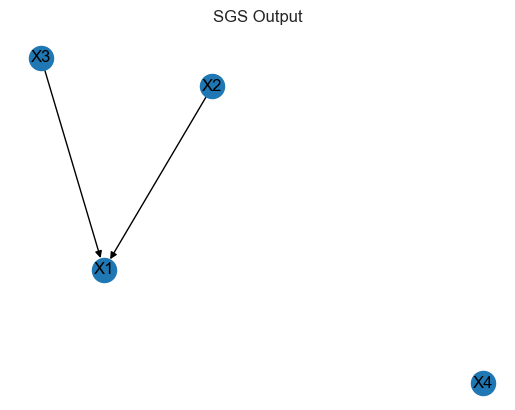

In [7]:
from src.util import *

plot_skeleton( dag, "SGS Output" )